In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

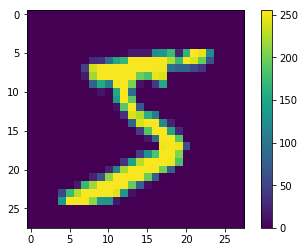

In [2]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

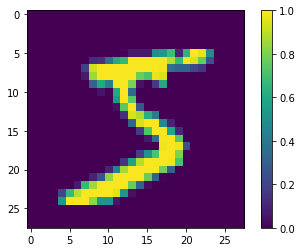

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

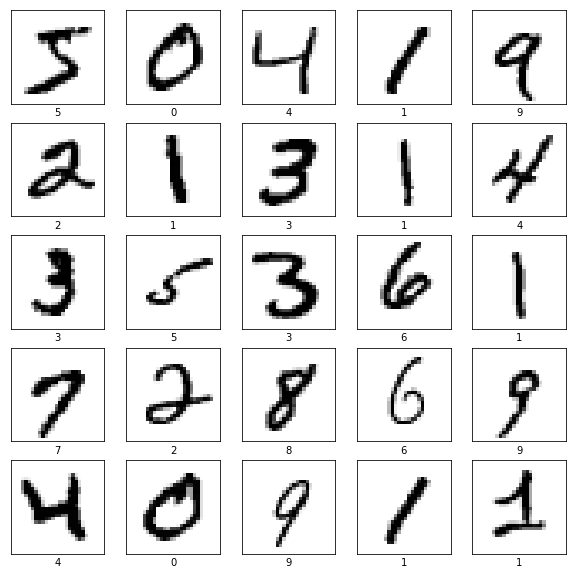

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 185us/sample - loss: 0.2202 - acc: 0.9348
Epoch 2/5
60000/60000 [==============================] - 11s 189us/sample - loss: 0.0976 - acc: 0.9702
Epoch 3/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0687 - acc: 0.9785
Epoch 4/5
60000/60000 [==============================] - 18s 296us/sample - loss: 0.0524 - acc: 0.9834
Epoch 5/5
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0442 - acc: 0.9856


In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.0692 - acc: 0.9793


[0.06917180364375236, 0.9793]

In [10]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [11]:
predictions = model.predict(x_test)

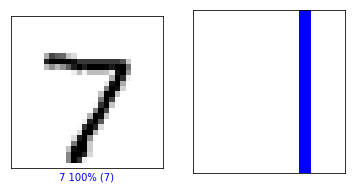

In [12]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

In [13]:
predictions[0]

array([1.0129907e-10, 1.3682465e-10, 9.9790569e-08, 4.3606687e-07,
       1.1144230e-15, 7.6359075e-10, 1.7102426e-16, 9.9999940e-01,
       7.0117145e-10, 1.9846953e-09], dtype=float32)

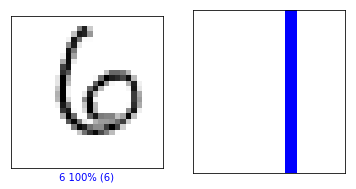

In [14]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

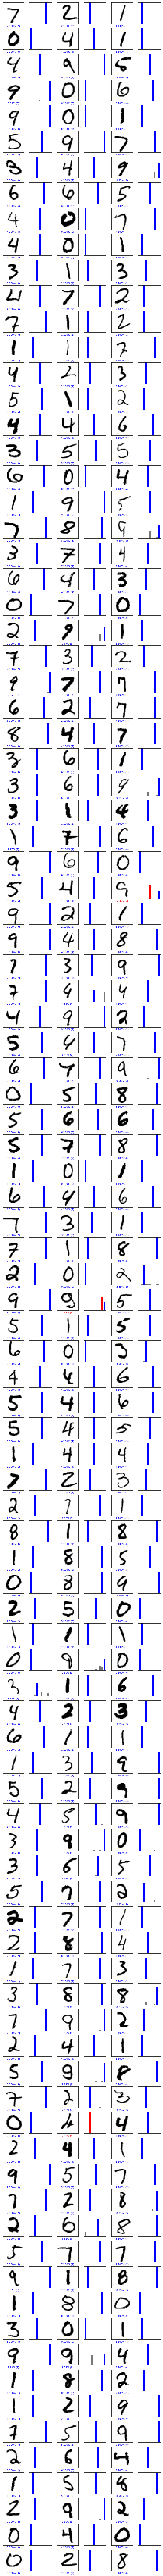

In [15]:
num_rows = 100
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

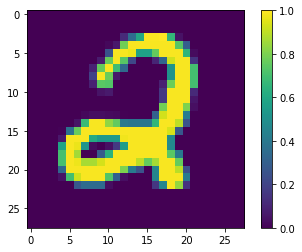

In [16]:
n = 147
img = x_test[n]
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.savefig("x_test[%d].png"%n)
plt.show()

In [17]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [18]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.6675558e-12 5.6586535e-09 1.0000000e+00 4.7800135e-08 3.0267247e-11
  2.5375890e-13 3.3858569e-10 1.7378442e-10 9.6783452e-09 2.4394587e-13]]


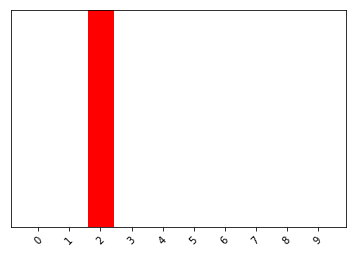

In [19]:
plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), range(10), rotation=45)

In [27]:
img = Image.open('4/3000.jpg').convert("L")

In [28]:
im2arr = np.array(img)

In [29]:
im2arr.shape

(28, 28)

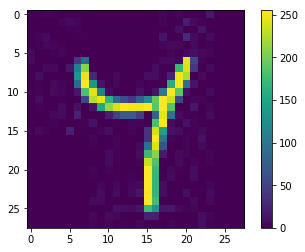

In [30]:
plt.figure()
plt.imshow(im2arr)
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
im2arr = (np.expand_dims(im2arr,0))
print(im2arr.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(im2arr)
print(predictions_single)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [33]:
np.argmax(predictions_single[0])

4